# HDS5210-2021 Final Project

Patient satisfaction is an important healthcare outcome. Many studies have been conducted around patient satisfaction. CMS uses HCAPHS scores to measure and compare patient satisfaction in different healthcare facilities. However, it is not clear how patient satisfaction is correlated with other outcome or factors.  

The purpose of the project was to examine:
- Whether there are differences between metropolitan areas in terms of patient overall satisfaction;
- Whether the overall satisfaction indicators are correlated with hospital utilization as measured by occupancy rate, revenue per bed, and length of stay; and
- Whether the satisfaction scores on individual patient experience components (e.g., communication) are correlated with the overall satisfaction and willingness to recommend

The findings would be useful for hospitals in making efforts to improve HCAHPS scores.

## 1. Data retrieval & manipulation

### 1-1. Data sources

The following data were retrieved:
- Patient satisfaction data for individual hospitals were retrieved from CMS (cvs format): https://data.cms.gov/provider-data/sites/default/files/resources/b815c061b038a789ce9427e52e9933ab_1616702714/HCAHPS-Hospital.csv
- Zip codes in top five metropolitan areas in the U.S. (html format) were retrieved from: https://www.bestplaces.net/
- Utilization data of MO hospitals including # of beds, discharges, patient days, and gross revenue stored as a local file in xlsx format (source: American Hospital Directory)

### 1-2. HCAHPS data

First, the CMS HCAHPS data for individual hospitals in a csv file was downloaded and read in as data frame. After examining the data frame, it was determined to focus on the linear mean scores for the overall satisfaction rating, willingness to recommend, and ratings on eight aspects of healthcare services including nurse communication, doctor communication, communication about medicines, care transition, discharge information, staff responsiveness, quietness, and cleanliness. These linear mean scores reflect adjustments to the raw scores due to the effects of patient mix and survey mode. Then, a long-to-wide pivoting transformation was performed so that each satisfaction score was included in one column. Next, the data in these columns were transformed to numeric to prepare for statistical analyses. Finally, the data frame was sliced to create a data frame that included only hospitals in Missouri (to be combined with the utilization data which only contained hospitals for Missouri).

In [1]:
# Read in HCAHPS data file from the website
import pandas as pd
hcahps = pd.read_csv('https://data.cms.gov/provider-data/sites/default/files/resources/b815c061b038a789ce9427e52e9933ab_1616702714/HCAHPS-Hospital.csv', na_values='Not Available')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (12,14,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Exclude measures other than HCAHPS linear mean scores - 
# which reflect CMS adjustments for the effects of patient mix and survey mode
hcahps_scores = hcahps[hcahps['HCAHPS Answer Description'].str[-17:]=='linear mean score']

In [3]:
# Long to wide pivoting transformation
index_list= ['Facility ID', 'Facility Name', 'Address', 'City','State','ZIP Code', 'Number of Completed Surveys', 'Survey Response Rate Percent', 'Start Date', 'End Date']
hcahps_scores_wide = hcahps_scores.pivot(index=index_list, columns='HCAHPS Question', values='HCAHPS Linear Mean Value')
hcahps_scores_all = hcahps_scores_wide.reset_index()

In [4]:
# Tranfer columns with scores to numeric
column_list = hcahps_scores_all.columns
for col in column_list:
    if col[-5:] == 'score':
        hcahps_scores_all[col] = pd.to_numeric(hcahps_scores_all[col])

In [5]:
# Set index to Facility ID
hcahps_scores_all.set_index('Facility ID')

HCAHPS Question,Facility Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date,Care transition - linear mean score,Cleanliness - linear mean score,Communication about medicines - linear mean score,Discharge information - linear mean score,Doctor communication - linear mean score,Nurse communication - linear mean score,Overall hospital rating - linear mean score,Quietness - linear mean score,Recommend hospital - linear mean score,Staff responsiveness - linear mean score
Facility ID,,,,,,,,,,,,,,,,,,,
010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,507.0,21.0,01/01/2019,12/31/2019,82.0,87.0,80.0,90.0,91.0,90.0,88.0,86.0,90.0,84.0
010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,568.0,30.0,01/01/2019,12/31/2019,81.0,85.0,80.0,90.0,93.0,91.0,88.0,85.0,88.0,83.0
010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,1136.0,23.0,01/01/2019,12/31/2019,80.0,86.0,76.0,84.0,92.0,90.0,86.0,87.0,87.0,78.0
010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,179.0,27.0,01/01/2019,12/31/2019,83.0,88.0,83.0,90.0,92.0,91.0,88.0,88.0,88.0,86.0
010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,46.0,25.0,01/01/2019,12/31/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670138,"PARK AMBULATORY SURGERY CENTER, LLC","5055 W PARK BLVD, SUITE 800",PLANO,TX,75093,NaN,NaN,01/01/2019,12/31/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670143,ASCENSION SETON BASTROP,"630 HIGWAY 71 W,",BASTROP,TX,78602,NaN,NaN,01/01/2019,12/31/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670259,CAPROCK HOSPITAL,3134 BRIARCRESRT DR,BRYAN,TX,77802,NaN,NaN,01/01/2019,12/31/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Narrow down to hospitals in Missouri
hcahps_scores_mo = hcahps_scores_all.loc[(hcahps_scores_all['State']=='MO')]

### 1-3. Merge HCAHPS data with zip code data for the top five metropolitan areas in the U.S.

The zip codes in each of the top five metropolitan areas in the U.S. were read from the relevant webpages at https://www.bestplaces.net/ and stored in five individual lists. Then a new 'metro' column was created in the HCAHPS DataFrame to indicate the metro areas where the hospitals was located. 

In [7]:
from bs4 import BeautifulSoup
import requests
headers = { "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36" }

# Identify the webpage for a particular metro area
ny_link = 'https://www.bestplaces.net/find/zip.aspx?msa=35620&st=ny'
la_link = 'https://www.bestplaces.net/find/zip.aspx?msa=31080&st=ca'
chi_link = 'https://www.bestplaces.net/find/zip.aspx?msa=16980&st=il'
dfa_link = 'https://www.bestplaces.net/find/zip.aspx?msa=19100&st=tx'
htx_link = 'https://www.bestplaces.net/find/zip.aspx?msa=26420&st=tx'

In [8]:
# Define a function to get a list of zip codes in a metro area
def getzips(weblink):
    """
    This function takes the address of a webpage from www.bestplaces.net that shows cities and zip codes in a metro area as a string. 
    Then it returns a list of zip codes in the metro area.
    """
    response = requests.get(weblink, headers=headers, verify=False)
    soup = BeautifulSoup(response.text, 'html.parser')
    div = soup.find_all('div', {"class":"col-md-4"})
    zip_list=[]
    for col in div:
        for cell in col.find_all('a'):
            zip_list.append(cell.text[:5])
    return zip_list

In [9]:
# Obtain zip code list for each of the top five metro areas by using the getzips function
ny_zip_list = getzips(ny_link)
la_zip_list = getzips(la_link)
chi_zip_list = getzips(chi_link)
dfa_zip_list = getzips(dfa_link)
htx_zip_list = getzips(htx_link)

/opt/tljh/user/lib/python3.6/site-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bestplaces.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/tljh/user/lib/python3.6/site-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bestplaces.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/tljh/user/lib/python3.6/site-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.bestplaces.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/tljh/user/lib/pyt

In [10]:
# Merge HCAHPS data with zp code data
# Create a 'Metro' column based on a hospital's zip code
hcahps_scores_all.loc[hcahps_scores_all['ZIP Code'].isin(ny_zip_list), 'Metro'] = 'NY'
hcahps_scores_all.loc[hcahps_scores_all['ZIP Code'].isin(la_zip_list), 'Metro'] = 'LA'
hcahps_scores_all.loc[hcahps_scores_all['ZIP Code'].isin(chi_zip_list), 'Metro'] = 'CHI'
hcahps_scores_all.loc[hcahps_scores_all['ZIP Code'].isin(dfa_zip_list), 'Metro'] = 'DFA'
hcahps_scores_all.loc[hcahps_scores_all['ZIP Code'].isin(htx_zip_list), 'Metro'] = 'HTX'

In [11]:
# Check # of hospitals in each metro area
hcahps_scores_all['Metro'].value_counts()

LA     103
DFA     84
NY      81
CHI     76
HTX     58
Name: Metro, dtype: int64

### 1-4. Merge HCAHPS data and hospital utlization data for MO hospitals

The hospital utilization data were read from the local xlsx file and combined with the HCAHPS data. The unique CMS certification numbers (stored in the 'Facility ID' column) were used to join the two DataFrames.

In [12]:
# Read in the hospital utlization data file stored locally
utilization_mo = pd.read_excel('mo_hospital_utilization.xlsx', na_values='0')

In [13]:
# Transfer columns with scores to numeric
column_list = utilization_mo.columns
for col in column_list[3:]:
    utilization_mo[col] = pd.to_numeric(utilization_mo[col])

In [14]:
# Merge DataFrames on the 'Facility ID' column
hcahps_utilization_mo = pd.merge(hcahps_scores_mo, utilization_mo, how='left', on=['Facility ID'])

In [15]:
# Create a new 'Occupancy' column to show the # of days a bed is occupied in a year
hcahps_utilization_mo['Occupancy'] = hcahps_utilization_mo.apply(lambda row: row.Patient_days / row.Beds, axis=1)

In [16]:
# Create a new 'LOS' column to show the # of days per stay
hcahps_utilization_mo['LOS'] = hcahps_utilization_mo.apply(lambda row: row.Patient_days / row.Discharges, axis=1)

In [17]:
# Create a new 'Revenue_per_bed' column to show the total annual revenue (in thounsands) per stay
hcahps_utilization_mo['Revenue_per_bed'] = hcahps_utilization_mo.apply(lambda row: row.Patient_revenue / row.Beds, axis=1)

In [18]:
# Check the new merged DataFrame
hcahps_utilization_mo.head()

,Facility ID,Facility Name,Address,City_x,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date,...,Staff responsiveness - linear mean score,Facility name,City_y,Beds,Discharges,Patient_days,Patient_revenue,Occupancy,LOS,Revenue_per_bed
0,260001,MERCY HOSPITAL JOPLIN,100 MERCY WAY,JOPLIN,MO,64804,1525.0,33.0,01/01/2019,12/31/2019,...,84.0,Mercy Hospital Joplin,Joplin,241.0,12057.0,54747.0,994042.0,227.165975,4.540682,4124.655602
1,260004,COOPER COUNTY COMMUNITY HOSPITAL,17651 B HWY,BOONVILLE,MO,65233,105.0,30.0,01/01/2019,12/31/2019,...,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,260005,SSM ST JOSEPH HEALTH CENTER,300 1ST CAPITOL DR,SAINT CHARLES,MO,63301,433.0,26.0,01/01/2019,12/31/2019,...,81.0,SSM Health Saint Joseph Hospital-Saint Charles,Saint Charles,406.0,11819.0,55144.0,800174.0,135.822660,4.665708,1970.871921
3,260006,MOSAIC LIFE CARE AT ST JOSEPH,5325 FARAON STREET,SAINT JOSEPH,MO,64506,450.0,21.0,01/01/2019,12/31/2019,...,82.0,Mosaic Life Care at St. Joseph Medical Center,Saint Joseph,352.0,21465.0,72356.0,1299870.0,205.556818,3.370883,3692.812500
4,260009,BOTHWELL REGIONAL HEALTH CENTER,601 E 14TH ST,SEDALIA,MO,65301,399.0,24.0,01/01/2019,12/31/2019,...,87.0,Bothwell Regional Health Center,Sedalia,108.0,3621.0,13811.0,353186.0,127.879630,3.814140,3270.240741


## 2. Compare metropolitan areas in terms of hospital patient's overall satisfaction

Descriptive statistics and plots (box, violin, KDE plots) were used to explore differences between metro areas in terms of the overall satisfaction score. ANOVA and multiple comparisons were conducted to find the significant differences.

Findings:
- There were significant differences between metro areas.
- Dallas and Houston metro areas were associated with highest scores, followed by Chicago and Los Angeles. Hospitals in New York area were rated the lowest.

### 2-1. Visualization & descriptive statistics

In [19]:
# Descriptive statistics
hcahps_scores_all['Overall hospital rating - linear mean score'].groupby(hcahps_scores_all['Metro']).agg(['count','min','mean','median','max', 'std','var'])

,count,min,mean,median,max,std,var
Metro,,,,,,,
CHI,65,67.0,86.661538,87.0,95.0,4.867870,23.696154
DFA,70,79.0,89.842857,90.0,96.0,3.573800,12.772050
HTX,40,83.0,89.125000,89.0,95.0,2.954245,8.727564
LA,90,76.0,86.744444,87.0,95.0,4.012792,16.102497
NY,75,77.0,84.933333,85.0,95.0,4.262766,18.171171


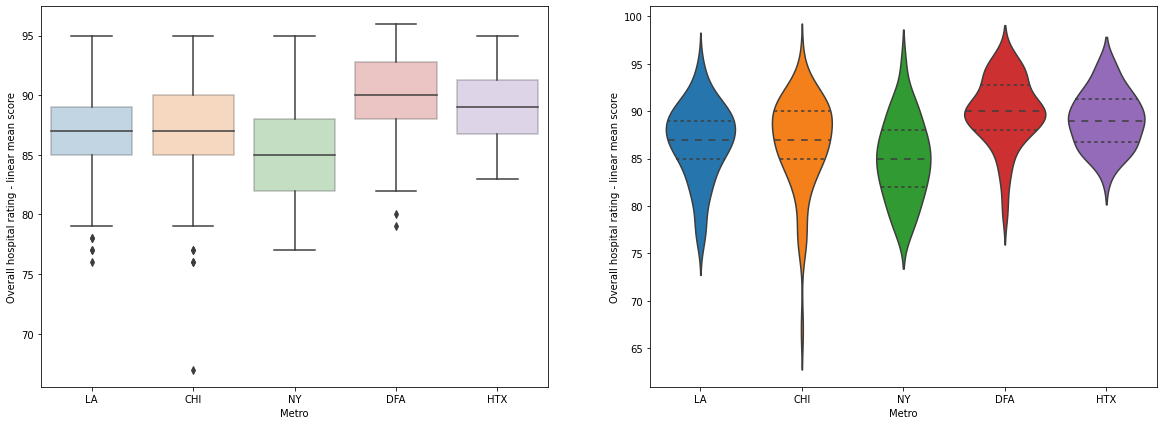

In [20]:
# Box plot & violin plot
from matplotlib import pyplot
import seaborn as sns
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(20,7))
sns.boxplot(ax = ax1, x = 'Metro', y = 'Overall hospital rating - linear mean score', data = hcahps_scores_all, boxprops=dict(alpha=.3))
sns.violinplot(ax = ax2, x = 'Metro', y = 'Overall hospital rating - linear mean score', data = hcahps_scores_all, inner="quartiles", saturation=0.9)

Metro
CHI    AxesSubplot(0.125,0.125;0.775x0.755)
DFA    AxesSubplot(0.125,0.125;0.775x0.755)
HTX    AxesSubplot(0.125,0.125;0.775x0.755)
LA     AxesSubplot(0.125,0.125;0.775x0.755)
NY     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Overall hospital rating - linear mean score, dtype: object

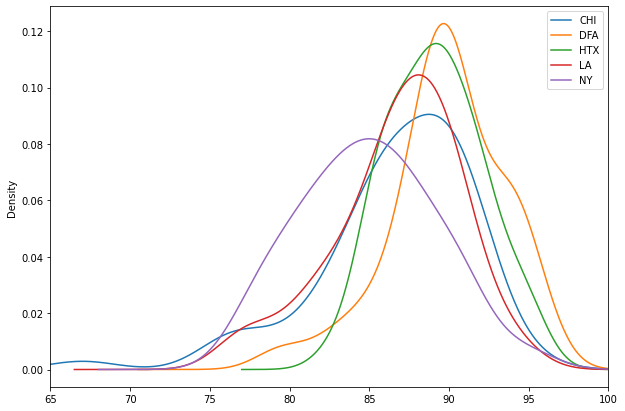

In [21]:
# Kernel density estimate (KDE) plot
hcahps_scores_all.groupby('Metro')['Overall hospital rating - linear mean score'].plot.kde(
    xlim=(65,100),
    legend=True,
    figsize=(10,7))

### 2-2. Statistical tests

In [22]:
# ANOVA test
import scipy.stats as stats
stats.f_oneway(hcahps_scores_all.dropna()['Overall hospital rating - linear mean score'][hcahps_scores_all['Metro'] == 'NY'],
               hcahps_scores_all.dropna()['Overall hospital rating - linear mean score'][hcahps_scores_all['Metro'] == 'LA'],
               hcahps_scores_all.dropna()['Overall hospital rating - linear mean score'][hcahps_scores_all['Metro'] == 'CHI'],
               hcahps_scores_all.dropna()['Overall hospital rating - linear mean score'][hcahps_scores_all['Metro'] == 'DFA'],
               hcahps_scores_all.dropna()['Overall hospital rating - linear mean score'][hcahps_scores_all['Metro'] == 'HTX'])

F_onewayResult(statistic=16.082854061601953, pvalue=4.661820236804548e-12)

In [23]:
# Multiple comparisons - Tukey HSD 
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(hcahps_scores_all.dropna()['Overall hospital rating - linear mean score'], hcahps_scores_all.dropna()['Metro'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CHI,DFA,3.1813,0.001,1.2643,5.0984,True
CHI,HTX,2.4635,0.0226,0.2269,4.7,True
CHI,LA,0.0829,0.9,-1.7287,1.8945,False
CHI,NY,-1.7282,0.09,-3.6142,0.1578,False
DFA,HTX,-0.7179,0.8984,-2.9238,1.4881,False
DFA,LA,-3.0984,0.001,-4.872,-1.3248,True
DFA,NY,-4.9095,0.001,-6.7591,-3.0599,True
HTX,LA,-2.3806,0.0185,-4.4955,-0.2656,True
HTX,NY,-4.1917,0.001,-6.3707,-2.0127,True
LA,NY,-1.8111,0.0367,-3.5512,-0.0711,True


In [24]:
# Multiple comparisons - Holm-Bonferroni
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "Holm")
tbl

group1,group2,stat,pval,pval_corr,reject
CHI,DFA,-4.3497,0.0,0.0002,True
CHI,HTX,-2.8871,0.0047,0.0237,True
CHI,LA,-0.116,0.9078,0.9078,False
CHI,NY,2.2397,0.0267,0.0801,False
DFA,HTX,1.0769,0.2839,0.5679,False
DFA,LA,5.08,0.0,0.0,True
DFA,NY,7.4877,0.0,0.0,True
HTX,LA,3.3655,0.001,0.0061,True
HTX,NY,5.5441,0.0,0.0,True
LA,NY,2.8061,0.0056,0.0237,True


## 3. Relationships between patient satisfaction and hospital utilization outcomes

Correlational analyses were conducted to examine the probable relationships between satisfaction indicators and hospital utilization outcomes including occupancy rate, total patient revenue, patient revenue per bed, and length of stay.

Finding:
- Patient's willingness to recommend was significantly correlated with hospital bed occupancy rate and patient revenue. 
- This confirmed that patient satisfaction was an important outcome that had significant financial consequences.

### 3-1. Visualization & descriptive statistics

In [25]:
# Descritive statistics of the satisfaction and utilization variables
hcahps_utilization_mo = hcahps_utilization_mo[['Facility ID', 'Overall hospital rating - linear mean score', 'Recommend hospital - linear mean score',
                                              'Beds', 'Discharges', 'Patient_days', 'Patient_revenue', 'Occupancy', 'LOS', 'Revenue_per_bed']]
hcahps_utilization_mo.describe()

,Overall hospital rating - linear mean score,Recommend hospital - linear mean score,Beds,Discharges,Patient_days,Patient_revenue,Occupancy,LOS,Revenue_per_bed
count,86.000000,86.000000,68.000000,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000
mean,88.511628,88.011628,244.426471,9888.911765,46711.338235,1.135674e+06,160.110519,4.136717,4476.616675
std,2.505261,3.455581,236.281095,10184.798360,56943.906784,1.257777e+06,70.234410,1.084645,2074.050595
min,82.000000,81.000000,37.000000,106.000000,240.000000,2.803500e+04,6.486486,2.074180,445.000000
25%,87.000000,85.000000,71.750000,2808.000000,8558.000000,3.217040e+05,105.709464,3.432379,2995.400000
50%,89.000000,88.500000,167.000000,5787.500000,22653.000000,6.921570e+05,161.342428,3.838930,4367.307222
75%,90.000000,91.000000,336.500000,13191.750000,64547.250000,1.615436e+06,209.283079,4.798339,5797.701929
max,95.000000,94.000000,1331.000000,52862.000000,321661.000000,6.661497e+06,303.451087,7.954106,8887.690391


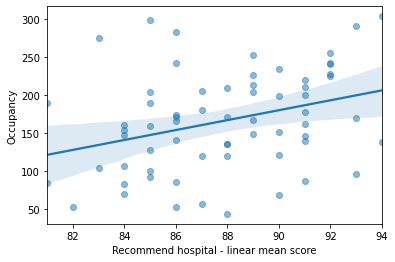

In [26]:
# Create scatter plots with fitted regression lines
import seaborn as sns
sns.regplot(x="Recommend hospital - linear mean score", y="Occupancy", data=hcahps_utilization_mo, scatter_kws={'alpha':0.5})

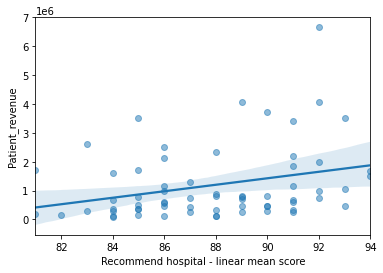

In [27]:
sns.regplot(x="Recommend hospital - linear mean score", y="Patient_revenue", data=hcahps_utilization_mo, scatter_kws={'alpha':0.5})

### 3-2. Correlation tests

In [28]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]    
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [29]:
# Define a function to calculate correlational coefficient and p-value
def corr(df, var1, var2):
    """
    The function takes a DataFrame, two strings - the names of two columns of the DataFrame; and 
    print the correlational coefficient and p-value
    """
    corr_r = df[[var1,var2]].corr(method='pearson')
    corr_p = df[[var1,var2]].corr(method=pearsonr_pval)
    print('coefficient: {}; p-value: {}'.format(round(corr_r.iloc[0,1], 4), round(corr_p.iloc[0,1], 4)))

In [30]:
# Calculate correlational coefficients and p-values
corr(hcahps_utilization_mo, 'Recommend hospital - linear mean score', 'Occupancy')
corr(hcahps_utilization_mo, 'Recommend hospital - linear mean score', 'Patient_revenue')
corr(hcahps_utilization_mo, 'Recommend hospital - linear mean score', 'Revenue_per_bed')
corr(hcahps_utilization_mo, 'Recommend hospital - linear mean score', 'LOS')

coefficient: 0.329; p-value: 0.0075
coefficient: 0.2947; p-value: 0.0172
coefficient: 0.1538; p-value: 0.2213
coefficient: 0.1758; p-value: 0.1613


In [31]:
corr(hcahps_utilization_mo, 'Overall hospital rating - linear mean score', 'Occupancy')
corr(hcahps_utilization_mo, 'Overall hospital rating - linear mean score', 'Patient_revenue')
corr(hcahps_utilization_mo, 'Overall hospital rating - linear mean score', 'Revenue_per_bed')
corr(hcahps_utilization_mo, 'Overall hospital rating - linear mean score', 'LOS')

coefficient: 0.2255; p-value: 0.0708
coefficient: 0.1903; p-value: 0.1289
coefficient: 0.148; p-value: 0.2392
coefficient: 0.035; p-value: 0.7817


## 4. Regression analysis on relative importance of patient satisfaction components

Descriptive statistics and correlations were calculated on the satisfaction scores of 8 individual patient experience components (e.g., communication) as well as the overall satisfaction. Then regression analysis with backward selection was conducted to identify relatively more important components.

Findings:
- Several patient experience components (including care transition, nurse communication, cleanliness, and quietness) were significant predictors of overall satisfaction.


### 4-1. Descriptive statistics

In [32]:
# Prepare for regression anaysis
# Remove rows with missing values 
hcahps_scores_df = hcahps_scores_all.drop(columns = 'Metro').dropna()

In [33]:
# Descriptives of all variables
hcahps_scores_df.iloc[:,-10:].describe(include='all')

HCAHPS Question,Care transition - linear mean score,Cleanliness - linear mean score,Communication about medicines - linear mean score,Discharge information - linear mean score,Doctor communication - linear mean score,Nurse communication - linear mean score,Overall hospital rating - linear mean score,Quietness - linear mean score,Recommend hospital - linear mean score,Staff responsiveness - linear mean score
count,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000
mean,81.872796,88.053195,78.908355,87.109858,91.574443,91.678231,88.537149,82.402428,88.001446,85.698468
std,2.886820,3.824528,4.399312,3.671843,2.407909,2.470232,3.344409,5.138955,4.432679,4.305312
min,66.000000,72.000000,53.000000,63.000000,79.000000,73.000000,67.000000,57.000000,59.000000,60.000000
25%,80.000000,86.000000,76.000000,85.000000,90.000000,90.000000,87.000000,79.000000,85.000000,83.000000
50%,82.000000,88.000000,79.000000,87.000000,92.000000,92.000000,89.000000,83.000000,88.000000,86.000000
75%,84.000000,91.000000,82.000000,89.000000,93.000000,93.000000,91.000000,86.000000,91.000000,89.000000
max,99.000000,100.000000,100.000000,99.000000,100.000000,100.000000,98.000000,100.000000,100.000000,99.000000


In [34]:
# Calculate correlation between variables
hcahps_scores_df.iloc[:,-10:].corr()

HCAHPS Question,Care transition - linear mean score,Cleanliness - linear mean score,Communication about medicines - linear mean score,Discharge information - linear mean score,Doctor communication - linear mean score,Nurse communication - linear mean score,Overall hospital rating - linear mean score,Quietness - linear mean score,Recommend hospital - linear mean score,Staff responsiveness - linear mean score
HCAHPS Question,,,,,,,,,,
Care transition - linear mean score,1.000000,0.607520,0.797662,0.734623,0.783856,0.823922,0.871065,0.615164,0.838256,0.752085
Cleanliness - linear mean score,0.607520,1.000000,0.648155,0.502416,0.571086,0.662768,0.659910,0.564079,0.564261,0.691085
Communication about medicines - linear mean score,0.797662,0.648155,1.000000,0.660695,0.707844,0.768297,0.757328,0.584353,0.679535,0.784956
Discharge information - linear mean score,0.734623,0.502416,0.660695,1.000000,0.593931,0.701074,0.675499,0.394864,0.651042,0.648701
Doctor communication - linear mean score,0.783856,0.571086,0.707844,0.593931,1.000000,0.804159,0.759773,0.632917,0.690026,0.687454
Nurse communication - linear mean score,0.823922,0.662768,0.768297,0.701074,0.804159,1.000000,0.846742,0.616642,0.769212,0.827719
Overall hospital rating - linear mean score,0.871065,0.659910,0.757328,0.675499,0.759773,0.846742,1.000000,0.635523,0.946542,0.755566
Quietness - linear mean score,0.615164,0.564079,0.584353,0.394864,0.632917,0.616642,0.635523,1.000000,0.535248,0.604721
Recommend hospital - linear mean score,0.838256,0.564261,0.679535,0.651042,0.690026,0.769212,0.946542,0.535248,1.000000,0.662429


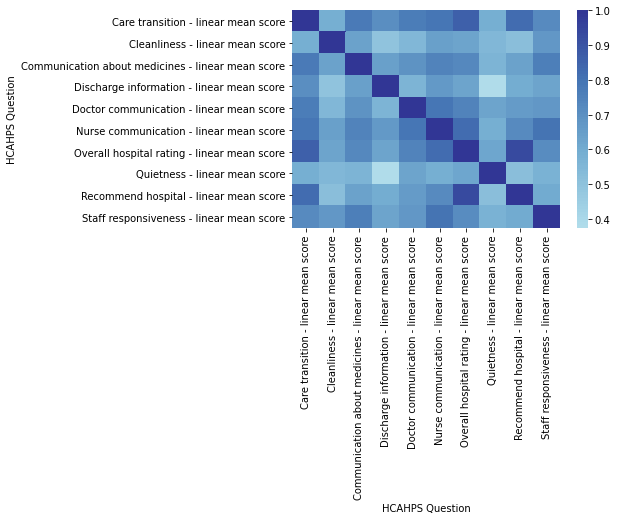

In [35]:
# Visualize the correlations between variables
sns.heatmap(hcahps_scores_df.iloc[:,-10:].corr('spearman'), center=0, cmap='RdYlBu')

### 4-2. Regression analysis

In [36]:
# Regressional analysis with backward selection
import numpy as np
import statsmodels.api as sm
x_list = ['Care transition - linear mean score',
          'Cleanliness - linear mean score',
          'Communication about medicines - linear mean score',
          'Discharge information - linear mean score',
          'Doctor communication - linear mean score',
          'Nurse communication - linear mean score',
          'Quietness - linear mean score',
          'Staff responsiveness - linear mean score']
y = hcahps_scores_df['Overall hospital rating - linear mean score']
r2adjusted_dict = {}
alpha = 0.05
max_pvalue = 1
while max_pvalue > alpha:
    x = hcahps_scores_df[x_list]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    r2adjusted_dict[str(x_list)] = round(model.rsquared_adj, 5)
    p_values = list(model.pvalues)
    max_pvalue = max(p_values)
    del x_list[p_values.index(max_pvalue) - 1]
final_model = model

In [37]:
# Examine the model with selected variables
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Overall hospital rating - linear mean score   R-squared:                       0.821
Model:                                                     OLS   Adj. R-squared:                  0.821
Method:                                          Least Squares   F-statistic:                     3968.
Date:                                         Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                                                 15:31:56   Log-Likelihood:                -6105.7
No. Observations:                                         3459   AIC:                         1.222e+04
Df Residuals:                                             3454   BIC:                         1.225e+04
Df Model:                                                    4                                         
Covariance Type:                                     nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     -10.7022      0.919    -11.651      0.000     -12.503      -8.901
Care transition - linear mean score         0.5753      0.015     37.835      0.000       0.546       0.605
Cleanliness - linear mean score             0.0890      0.009     10.181      0.000       0.072       0.106
Nurse communication - linear mean score     0.4413      0.019     23.669      0.000       0.405       0.478
Quietness - linear mean score               0.0466      0.006      7.389      0.000       0.034       0.059
==============================================================================
Omnibus:                      315.592   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.073
Skew:                          -0.541   Prob(JB):                    1.21e-166
Kurtosis:                       5.032   Cond. No.                     6.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Check models in the backward slection process & the adjusted R-squared values  
r2adjusted_dict

{"['Care transition - linear mean score', 'Cleanliness - linear mean score', 'Communication about medicines - linear mean score', 'Discharge information - linear mean score', 'Doctor communication - linear mean score', 'Nurse communication - linear mean score', 'Quietness - linear mean score', 'Staff responsiveness - linear mean score']": 0.82099,
 "['Care transition - linear mean score', 'Cleanliness - linear mean score', 'Communication about medicines - linear mean score', 'Discharge information - linear mean score', 'Doctor communication - linear mean score', 'Nurse communication - linear mean score', 'Quietness - linear mean score']": 0.82102,
 "['Care transition - linear mean score', 'Cleanliness - linear mean score', 'Communication about medicines - linear mean score', 'Doctor communication - linear mean score', 'Nurse communication - linear mean score', 'Quietness - linear mean score']": 0.82106,
 "['Care transition - linear mean score', 'Cleanliness - linear mean score', 'Docto

## 3. Conclusions

Based on analyses of HCAHPS, zip codes, and hospital utilization data from the three sources, it can be concluded that:
- Significant differences exist between the metropolitan areas in terms of overall patient satisfaction. Among the top five metropolitan areas in the U.S., Dallas and Houston metro areas were associated with highest overall satisfaction scores, followed by Chicago and Los Angeles. Hospitals in New York area were rated the lowest. The root causes behind these differences need to be explored in future research.
- Based on data from Missouri hospitals, patient's willingness to recommend was significantly correlated with hospital bed occupancy rate and patient revenue. This confirmed that patient satisfaction was an important outcome that had significant financial consequences.
- Several patient experience components (including care transition, nurse communication, cleanliness, and quietness) were significant predictors of overall satisfaction. Hospitals should pay more attention to these aspects in order to improve patient overall satisfaction. 
